## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [50]:
x_points = np.linspace(0,20)

In [51]:
y_points = ( -2 * x_points) + 1

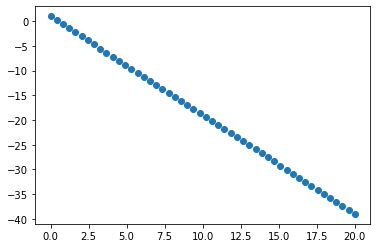

In [52]:
plt.scatter(x_points, y_points)
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [148]:
def Gradient_Descent (x_points, y_points, learning_rate, max_iterations):

    theta_0 = 0     # assumed value of the prameters
    theta_1 = 0
    learning_rate = learning_rate
    cost = []
    All_theta_0 = []
    All_theta_1 =[]
    All_Hypothesis =[]
    iter1 =0

    for i in range (0, max_iterations):
        
        hypothesis = theta_0 + theta_1* x_points
        All_Hypothesis.append(hypothesis)
        
        All_theta_0.append(theta_0)
        All_theta_1.append(theta_1)
        
        cost_function = (sum (hypothesis - y_points)**2 )/ (2*len(y_points))
        cost.append(cost_function)
    
        theta0_gradient = np.sum (hypothesis - y_points) / len(y_points)
        theta1_gradient = np.sum ((hypothesis - y_points)*x_points) / len(y_points)
    
        theta_0 = theta_0 - learning_rate * theta0_gradient
        theta_1 = theta_1 - learning_rate * theta1_gradient
        
        iter1+=1
        if (cost_function < 0.01):
            break
       
    
    optimum_theta0 = theta_0
    optimum_theta1 = theta_1
    
    return All_theta_0,All_theta_1, cost , All_Hypothesis, optimum_theta0, optimum_theta1, hypothesis, iter1

#### Try your function with any input parameterss of your choice.

In [149]:
All_theta_0,All_theta_1, cost , All_Hypothesis, optimum_theta0, optimum_theta1, hypothesis, iterations = Gradient_Descent(x_points, y_points, 0.01, 1000)
print(cost)

[9025.0, 1270.486006872137, 113.60141154313727, 33.005234161615896, 0.005331682559270425]


#### Calculate r2 score

In [150]:
SS_res = sum((y_points - hypothesis)**2)
Mean = np.mean (y_points) 
SS_tot= sum ((y_points - Mean)**2)
R_score = 1- (SS_res/ SS_tot)
print(R_score)

0.996731525280375


In [151]:
from sklearn.metrics import r2_score

In [164]:
sklearn.metrics.r2_score(hypothesis, y_points)

0.9963232297641503

#### Plot loss vs. epochs

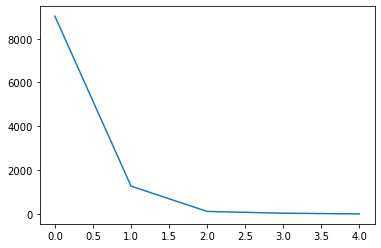

In [153]:
plt.plot(cost)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

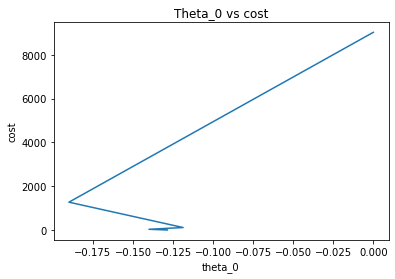

In [154]:
plt.plot(All_theta_0, cost)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs cost')
plt.show()

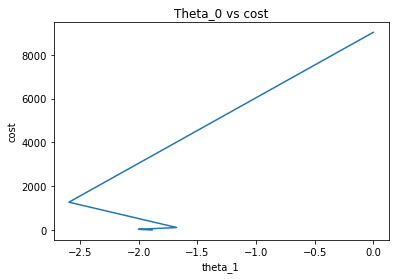

In [155]:
plt.plot(All_theta_1, cost)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_0 vs cost')
plt.show()

#### Plot all regression lines till converge

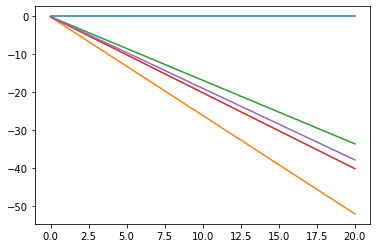

In [114]:
for i in range(len(All_Hypothesis)):
    plt.plot(x_points, All_Hypothesis[i])
plt.show()

#### Plot the best regression line

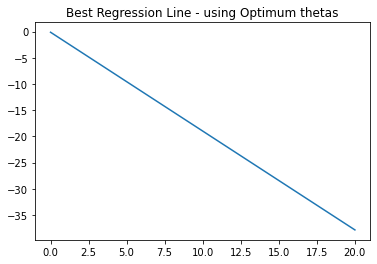

In [116]:
plt.plot(x_points, hypothesis)
plt.title('Best Regression Line - using Optimum thetas')
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [117]:
All_theta_0,All_theta_1, cost , All_Hypothesis, optimum_theta0, optimum_theta1, hypothesis, iterations = Gradient_Descent(x_points, y_points, 0.051, 1000)


<ipython-input-105-8745b5fb5a93>:20: RuntimeWarning: overflow encountered in double_scalars
  cost_function = (sum (hypothesis - y_points)**2 )/ (2*len(y_points))
C:\Users\Sara Hegazy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-105-8745b5fb5a93>:14: RuntimeWarning: invalid value encountered in multiply
  hypothesis = theta_0 + theta_1* x_points


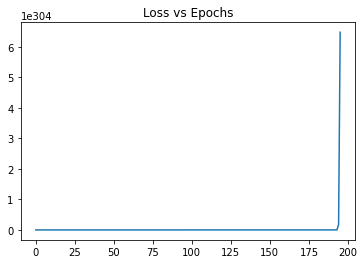

In [124]:
plt.plot(cost)
plt.title('Loss vs Epochs')
plt.show()

### All Regression Lines till converge:


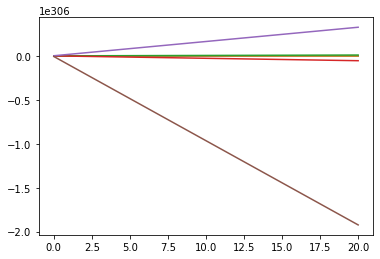

In [127]:
for i in range(len(All_Hypothesis)):
    plt.plot(x_points, All_Hypothesis[i])
plt.show()

### Best Regression Line:

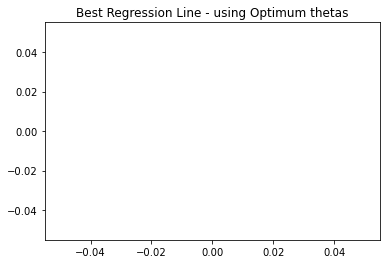

In [128]:
plt.plot(x_points, hypothesis)
plt.title('Best Regression Line - using Optimum thetas')
plt.show()

In [129]:
print(hypothesis)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [311]:
def Mini_Batch_Gradient_Descent (x_points, y_points, learning_rate, max_iterations, batch_size):

    theta_0 = 0     # assumed value of the prameters
    theta_1 = 0
    learning_rate = learning_rate
    cost = []
    All_theta_0 = []
    All_theta_1 =[]
    All_Hypothesis =[]
    iter =0
    x_points_batch=[]
    y_points_batch=[]
    Hypothesis_list = []
    
    for k in range(max_iterations):
        for i in range (0,len(x_points),batch_size):
             
            if i == len(x_points):
                Break
            for j in range(i,i+batch_size):
            
                x_points_batch.append(x_points[j])
                y_points_batch.append(y_points[j])
            
            
           
            x_points_batch1 = np.array(x_points_batch)
            y_points_batch1 = np.array(y_points_batch)
        
            
        
            hypothesis = theta_0 + theta_1* x_points_batch1
            All_Hypothesis.append(hypothesis)
        
            All_theta_0.append(theta_0)
            All_theta_1.append(theta_1)
        
            cost_function = (sum (hypothesis - y_points_batch1)**2 )/ (2*(batch_size))
            cost.append(cost_function)
    
            theta0_gradient = np.sum (hypothesis - y_points_batch1) / batch_size
            theta1_gradient = np.sum ((hypothesis - y_points_batch1)*x_points_batch1) / batch_size
    
            theta_0 = theta_0 - learning_rate * theta0_gradient
            theta_1 = theta_1 - learning_rate * theta1_gradient
            
            x_points_batch.clear()
            y_points_batch.clear()
        
        iter+=1
        if (cost_function < 0.01):
            break
       
            
        Hypothesis = theta_0 + theta_1*x_points
        Hypothesis_list.append(Hypothesis)
    optimum_theta0 = theta_0
    optimum_theta1 = theta_1
    hypothesis = optimum_theta0 + optimum_theta1* x_points
    
    return All_theta_0,All_theta_1, cost , All_Hypothesis, optimum_theta0, optimum_theta1, hypothesis, iter,  Hypothesis_list

In [312]:
 All_theta_0,All_theta_1, cost , All_Hypothesis, optimum_theta0, optimum_theta1, hypothesis, iterations,  Hypothesis_list = Mini_Batch_Gradient_Descent (x_points, y_points, 0.0001, 100, 10)

In [313]:
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(hypothesis, y_points)

0.9974191558792117

In [314]:
cost

[35.7371928363182,
 586.6540019606473,
 1790.6144242544838,
 3587.1154141460415,
 5829.9420700475,
 29.548931333665735,
 507.20564563114675,
 1557.7782487593097,
 3128.4902982422277,
 5091.534548042466,
 24.30158729426602,
 438.23783571406796,
 1355.0029416979687,
 2728.5591139591884,
 4447.169982621625,
 19.86477613379149,
 378.3878236343372,
 1178.4219640665688,
 2379.8065464412466,
 3884.837242550186,
 16.125470293239534,
 326.4687768844036,
 1024.6651475033016,
 2075.679811439344,
 3394.061516807165,
 12.98573224402686,
 281.44715369604614,
 890.7950355470391,
 1810.4653616649048,
 2965.707656224151,
 10.360740799454893,
 242.42298215185897,
 774.2513848342005,
 1579.1813873318083,
 2591.808698609445,
 8.177072965543639,
 208.61267125384967,
 672.8027805504196,
 1377.4840875425532,
 2265.4163517700076,
 6.371208415308017,
 179.33402921187422,
 584.5044544378203,
 1201.5859483839051,
 1980.4706220321946,
 4.888227899305211,
 153.99320584144596,
 507.6615104767029,
 1048.184489598922

#### Plot loss vs. epochs

500


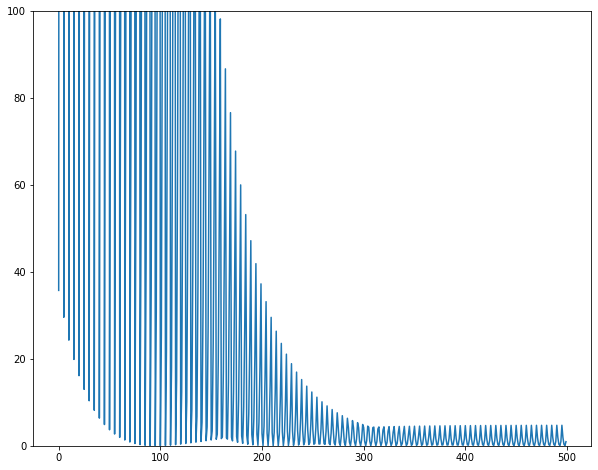

In [315]:
print(len(cost))
#plt.scatter(np.arange(250),cost)
#plt.show()
plt.figure(figsize=(10,8))
plt.ylim(0,100)
plt.plot(cost)
plt.show()

### All Regression Lines till converge:

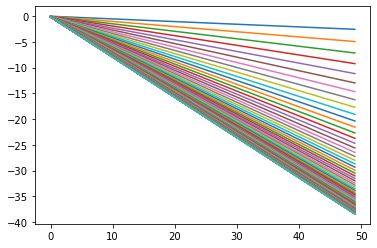

In [316]:
for i in range(len(Hypothesis_list)):
    
    plt.plot( Hypothesis_list[i])
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD